Exercise 1 : Use the openpyxl module to create a new workbook and add values/formulae to it

In [1]:
!pip install openpyxl


In [3]:
#create a new workbook:

from openpyxl import Workbook
from openpyxl.styles import Font

# Creating a new Excel workbook and sheet
wb = Workbook()
ws = wb.active

ws['A1'] = 'First number ==>'
ws['A2'] = 'Second number ==>'

ws['B1'] = 2
ws ['B2'] = 8

ws['B3'] = "=B1 * B2"

wb.save('exercise1.xlsx')

print("This worked. I created exercise1.xlsx")






This worked. I created exercise1.xlsx


In [4]:
wb.close()

In [5]:
from google.colab import files
files.download('exercise1.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Exercise 2 : Open an Excel workbook and read down a list of plants finding the ones not in stock

In [12]:
#create a program called Night-scented unstocked.py to:
from google.colab import files
uploaded = files.upload()

#import the openpyxl module

from openpyxl import load_workbook

workbook = "Plants.xlsx"
wb = load_workbook(workbook)
ws = wb["Sheet1"]

ws.cell(row=2, column=1)

A2 = ws.cell(row=2, column=1)
print(A2.value) #get a reference to cell A2


Saving Plants.xlsx to Plants.xlsx
Hebe


In [11]:
import os

for f in os.listdir():
    if f.startswith("Plants"):
        os.remove(f)
        print("Deleted:", f)

Deleted: Plants (1).xlsx
Deleted: Plants (2).xlsx


In [15]:
this_plant = ws.cell(row=2, column=1)

int_check = 0

while True:
  int_check +=1
  if int_check > 100:
    print("Int Check Triggered")
    break

  this_plant = this_plant.offset(1,0)

  if this_plant.value is None:
    print("\n Not in Stock.")
    break

  stock_cell = this_plant.offset(0,7)

  if stock_cell.value == "No":
    print(this_plant.value)

wb.close()

Honeysuckle
Lupin
Skimmia
Rosa
Gladioli

 Not in Stock.


Exercise 3 : Load Excel File and Write the Data

From this file, do the following tasks :

    Load Excel File and give path to your file
    Perform data manipulation on the DataFrame by filtering the data where ‘Sales’ is greater than 1000.
    Use Openpyxl to write the filtered data back to the Excel file




In [17]:
import pandas as pd

from google.colab import files

uploaded = files.upload()

df = pd.read_excel('data.xlsx') #give path to your file


Saving data.xlsx to data (1).xlsx


In [18]:
#perform data manipulation by filtering "sales"
df.head()



,Sales
0,230
1,240
2,250
3,260
4,270


In [25]:
#Perform data manipulation on the DataFrame by filtering the data where ‘Sales’ is greater than 1000.

df = df[df['Sales'] > 1000]
print(df)

      Sales
78     1010
79     1020
80     1030
81     1040
82     1050
...     ...
1294  13170
1295  13180
1296  13190
1297  13200
1298  13210

[1221 rows x 1 columns]


In [26]:
from openpyxl import load_workbook

wb = load_workbook("data.xlsx")

ws_name = "Filtered" #create new

ws = wb.create_sheet(ws_name)
ws.append(list(df.columns))

for row in df.values.tolist():
  ws.append(row)


wb.save("data.xlsx")
wb.close()

In [27]:
from google.colab import files
files.download("data.xlsx")
#it worked

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Exercise 4 : Load Excel File, plot charts and Manipulate Data

    import the necessary libraries pandas and matplotlib.pyplot, read data from an Excel file productSales.xlsx
    Manipulate the data by grouping it by ‘product’ and summing the sales for each product using pandas’ group by () and sum() functions
    Export it back into a new Excel file (‘sales_report.xlsx’) using pandas’ to_excel() function
    Save and close the file using the save() and close() methods of the ExcelWriter object.


In [28]:
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import files

uploaded = files.upload()

df = pd.read_excel('productSales.xlsx') #give path to your file


Saving productSales.xlsx to productSales.xlsx


      product  sales
0       Apple     84
1      Banana    103
2  Strawberry    115
3  Watermelon     96


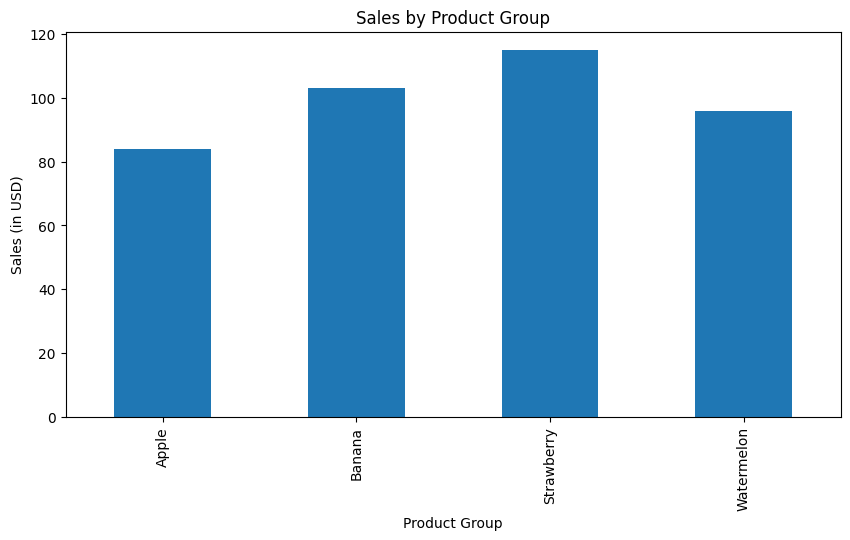

In [45]:
prd_group = df.groupby('product')['sales'].sum()

prd_group_df=prd_group.reset_index()
print(prd_group_df)

plt.figure(figsize=(10,5))
prd_group.plot(kind="bar")
plt.title("Sales by Product Group")
plt.xlabel("Product Group")
plt.ylabel("Sales (in USD)")
plt.show()


In [46]:
writer = pd.ExcelWriter('sales_report.xlsx', engine='openpyxl')

#Write data
prd_group_df.to_excel(writer,sheet_name='Sheet1', index=False)

#Save and close file
#writer.save()
writer.close()
print("sales_report.xlsx created successfully")

sales_report.xlsx created successfully


In [47]:
check = pd.read_excel("sales_report.xlsx")
print(check)

      product  sales
0       Apple     84
1      Banana    103
2  Strawberry    115
3  Watermelon     96
